In [300]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from keras import layers, Sequential
from sklearn.metrics import accuracy_score, auc

In [222]:
data=sns.load_dataset('iris')

In [223]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [225]:
data.duplicated().sum()

1

In [226]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [227]:
data=data.drop_duplicates().reset_index()

In [228]:
data=data.drop(['index'], axis=1)

In [229]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [230]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<Axes: >

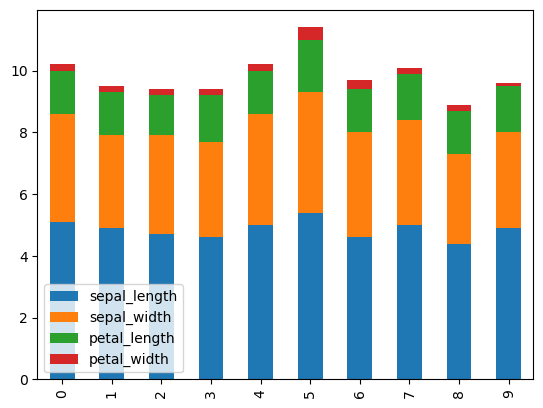

In [231]:
data.iloc[:10,:-1].plot(kind='bar', stacked=True)

<Axes: ylabel='species'>

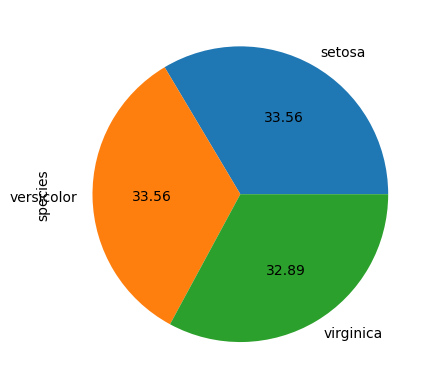

In [232]:
data['species'].value_counts().plot(kind='pie', autopct='%.2f')

In [233]:
df=data.copy()

In [234]:
dat=df.groupby('species').mean()

In [235]:
dat

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


<Axes: xlabel='species'>

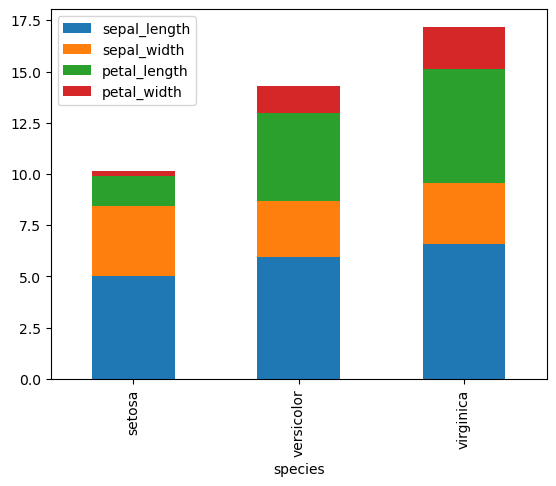

In [236]:
dat.plot(kind='bar', stacked=True)

In [237]:
df=pd.get_dummies(df, columns=['species'])

In [238]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [239]:
X=df.iloc[:,:4]
Y=df.iloc[:,4:]

In [240]:
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state=30)

In [241]:
x_train, x_val, y_train, y_val=train_test_split(x_train,y_train, test_size=0.2, random_state=30)

In [242]:
best=SelectKBest(score_func=chi2, k=2)
best.fit(x_train, y_train)

SelectKBest(k=2, score_func=<function chi2 at 0x00000201F06C1630>)

In [243]:
best.scores_

array([ 6.93508574,  2.30117267, 72.50822515, 37.96462625])

In [244]:
best.get_feature_names_out()

array(['petal_length', 'petal_width'], dtype=object)

In [245]:
d=pd.DataFrame(best.scores_, columns=['Scores']).set_index(pd.DataFrame(X).columns)
d

,Scores
sepal_length,6.935086
sepal_width,2.301173
petal_length,72.508225
petal_width,37.964626


<Axes: >

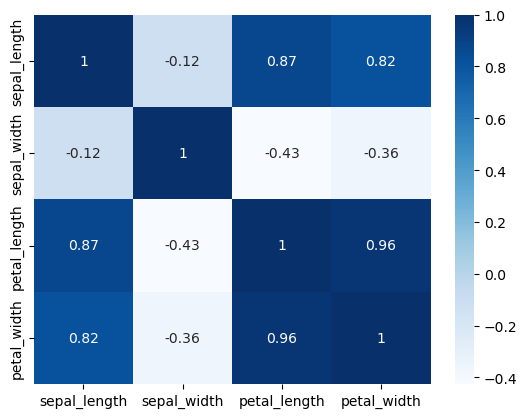

In [246]:
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap='Blues')

<Axes: xlabel='petal_length', ylabel='petal_width'>

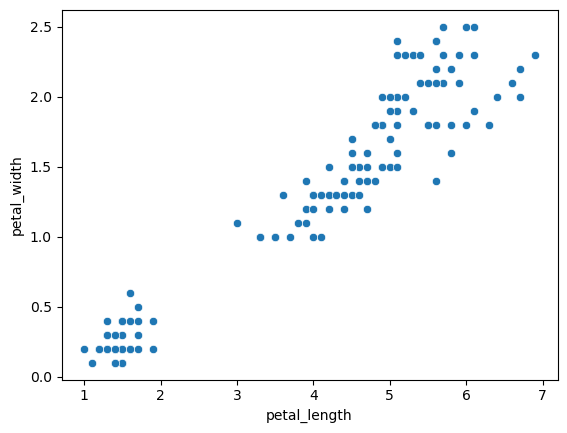

In [247]:
sns.scatterplot(df, x='petal_length', y='petal_width')

<Axes: xlabel='petal_length', ylabel='sepal_length'>

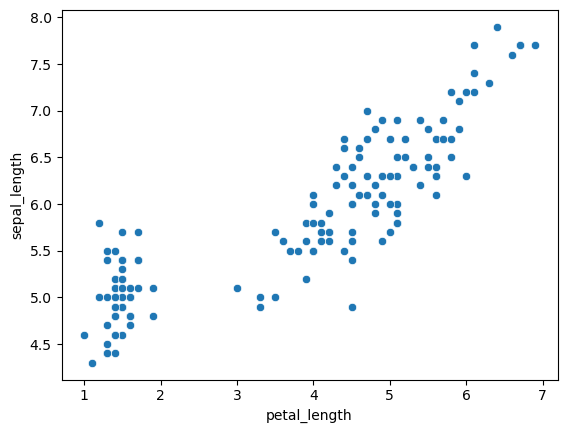

In [248]:
sns.scatterplot(df, x='petal_length', y='sepal_length')

<Axes: xlabel='petal_length', ylabel='sepal_width'>

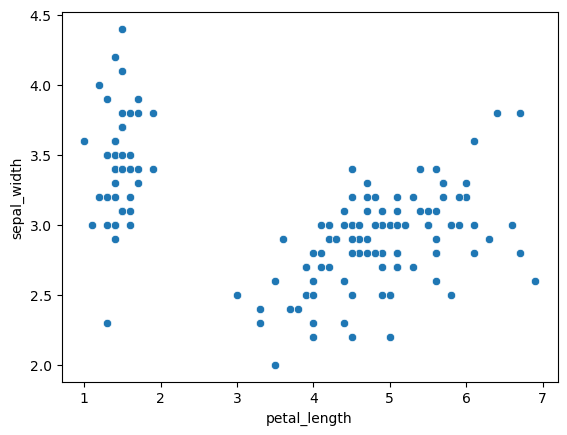

In [249]:
sns.scatterplot(df, x='petal_length', y='sepal_width')

<Axes: xlabel='species', ylabel='count'>

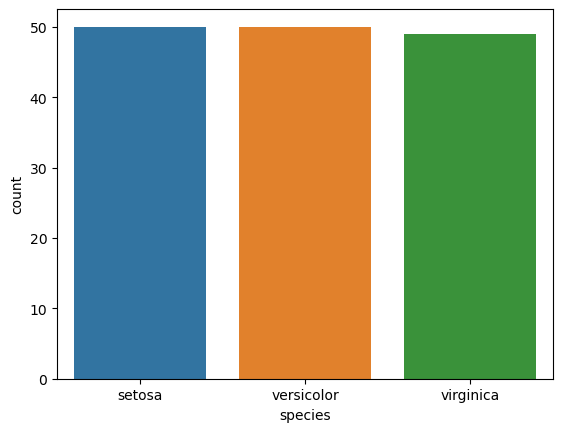

In [299]:
sns.countplot(data, x='species')

In [250]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

### Model

In [289]:
metrics=[
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc')
]

In [314]:
model=Sequential([
    layers.Dense(16, input_shape=(x_train.shape[1],), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [315]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=metrics
)

In [316]:
early_stopping=keras.callbacks.EarlyStopping(patience=3, verbose=1)

In [317]:
ann=model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=10,
    callbacks=[early_stopping],
    shuffle=True,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/100
10/10 [==============================] - 2s 54ms/step - loss: 1.0830 - accuracy: 0.4874 - auc: 0.7259 - val_loss: 1.0363 - val_accuracy: 0.5000 - val_auc: 0.7847
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.9947 - accuracy: 0.4842 - auc: 0.7314 - val_loss: 0.9647 - val_accuracy: 0.8333 - val_auc: 0.9071
Epoch 3/100
10/10 [==============================] - 0s 12ms/step - loss: 0.9801 - accuracy: 0.5684 - auc: 0.7420 - val_loss: 0.8918 - val_accuracy: 0.8333 - val_auc: 0.9336
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.9021 - accuracy: 0.6105 - auc: 0.8286 - val_loss: 0.8129 - val_accuracy: 0.8333 - val_auc: 0.9388
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.8569 - accuracy: 0.6632 - auc: 0.8393 - val_loss: 0.7391 - val_accuracy: 0.8333 - val_auc: 0.9449
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.7652 - accuracy: 0.6947 - auc: 0.8935 - val_loss: 0.675

Epoch 48/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0924 - accuracy: 0.9789 - auc: 0.9985 - val_loss: 0.0622 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 49/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0971 - accuracy: 0.9789 - auc: 0.9983 - val_loss: 0.0631 - val_accuracy: 0.9583 - val_auc: 0.9991
Epoch 50/100
10/10 [==============================] - 0s 12ms/step - loss: 0.0653 - accuracy: 1.0000 - auc: 1.0000 - val_loss: 0.0667 - val_accuracy: 0.9583 - val_auc: 0.9991
Epoch 51/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0845 - accuracy: 0.9789 - auc: 0.9984 - val_loss: 0.0681 - val_accuracy: 0.9583 - val_auc: 0.9991
Epoch 51: early stopping


In [318]:
model.evaluate(x_train, y_train, batch_size=10, callbacks=[early_stopping])

10/10 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.9789 - auc: 0.9998


[0.05008157342672348, 0.9789473414421082, 0.9997783899307251]

In [319]:
pred=model.predict(x_test[:5])
pred

1/1 [==============================] - 0s 78ms/step


array([[3.5856062e-04, 5.3094238e-01, 4.6869904e-01],
       [1.7718770e-05, 1.9231880e-02, 9.8075038e-01],
       [4.7608337e-06, 2.6780597e-03, 9.9731714e-01],
       [2.6383137e-04, 4.0270247e-02, 9.5946598e-01],
       [8.2013810e-07, 9.7249862e-04, 9.9902666e-01]], dtype=float32)

In [320]:
model.evaluate(x_test, y_test, batch_size=10, callbacks=[early_stopping])

3/3 [==============================] - 0s 16ms/step - loss: 0.1019 - accuracy: 0.9333 - auc: 0.9956


[0.10185129940509796, 0.9333333373069763, 0.995555579662323]

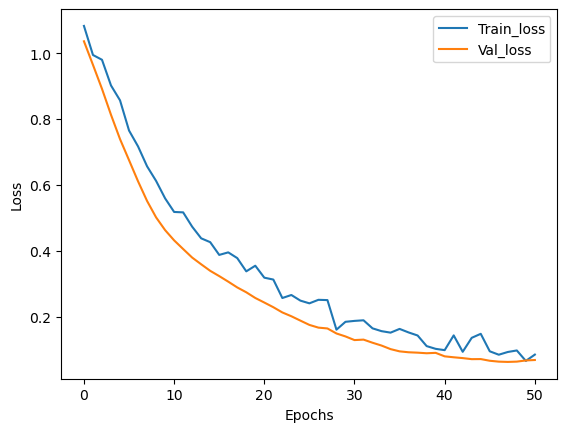

In [323]:
plt.plot(ann.epoch, ann.history['loss'], label='Train_loss')
plt.plot(ann.epoch, ann.history['val_loss'], label='Val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

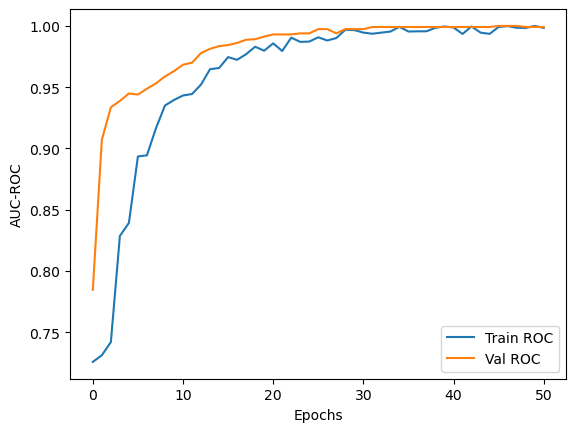

In [324]:
plt.plot(ann.epoch, ann.history['auc'], label='Train ROC')
plt.plot(ann.epoch, ann.history['val_auc'], label='Val ROC')
plt.xlabel('Epochs')
plt.ylabel('AUC-ROC')
plt.legend()
plt.show()